In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Current device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.6.0+cu118
CUDA available: True
Current device: NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [4]:
df = pd.read_csv('spam_ham_india.csv')

In [5]:
df

,Msg,Label
0,CONGRATULATIONS! FREE 2GB data is yours! Claim...,spam
1,Hi! Thank you for being with Vi-India's FASTES...,spam
2,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",spam
3,I will try to manage took tablets,ham
4,Study from Home with Vi!! Watch Kite Victers C...,spam
...,...,...
2262,"Dear Customer, You have a missed call from +91...",spam
2263,"Dear User, Vistor Id - 7538XXX. Loan Applicati...",spam
2264,"Congrats, Y0UR Received Rs.592000 L0AN is Appr...",spam
2265,Hi! 50% off on proc. fees will be gone soon! A...,spam


In [6]:
for col in df.columns:
    print('\n')
    print(f'{df[col].value_counts()}')



Msg
?image omitted                                                                                                                                                                                                       27
Ok                                                                                                                                                                                                                   18
Hi team                                                                                                                                                                                                              13
??                                                                                                                                                                                                                   12
Joined                                                                                                                            

In [7]:
x=df['Msg']
y=df['Label']

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def clean_text(text):

    if isinstance(text, float):  # Handle NaN or float values
        text = ""

    text = text.lower() #convert to lowercase
    text = re.sub(r'\W', ' ', text) # remove special characters
    text = re.sub(r'\s+' , ' ' , text).strip() #remove extra spaces
    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')] #removing stop words

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # Lemmatization

    return ' '.join(tokens)



In [12]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
x = x.apply(clean_text)



In [14]:
x

0       congratulation free 2gb data claim airtel than...
1       hi thank vi india fastest 4g ookla verified lo...
2       part cyber swachhta pakhwada cert goi advises ...
3                                  try manage took tablet
4       study home vi watch kite victers channel free ...
                              ...                        
2262    dear customer missed call 918431333249 last mi...
2263    dear user vistor id 7538xxx loan application r...
2264    congrats y0ur received r 592000 l0an approve 1...
2265    hi 50 proc fee gone soon apply olyv formerly s...
2266    congrats user r 15ooo bonus credited wallet xx...
Name: Msg, Length: 2267, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=42)

In [17]:
y_train = y_train.replace({'ham':0 , 'spam':1})
y_test = y_test.replace({'ham':0 , 'spam':1})


C:\Users\Shiva\AppData\Local\Temp\ipykernel_22444\3251901739.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'ham':0 , 'spam':1})
C:\Users\Shiva\AppData\Local\Temp\ipykernel_22444\3251901739.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'ham':0 , 'spam':1})


XGB

In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb


using bayesian optimizer to find the best hyper parameters available

In [154]:
def xgb_csv(max_depth , learning_rate , n_estimators , gamma , min_child_weight, subsample , colsample_bytree):
    params = {
        'max_depth' : int(max_depth),
        'learning_rate' : learning_rate,
        'n_estimators' : int(n_estimators),
        'gamma' : gamma,
        'min_child_weight' : min_child_weight,
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,
        'objective' : 'binary:logistic',
        'eval_metric' : 'logloss'

    } 

    cv_results = cross_val_score(
        xgb.XGBClassifier(**params),
        x_train , y_train,
        scoring='accuracy',
        cv=5
    )

    return cv_results.mean()

set the range for hyperparameters and initialize bayesian optimization


In [155]:
pbounds = {
       'max_depth': (3, 10),
    'learning_rate': (0.01, 0.05),
    'n_estimators': (50, 500),
    'gamma': (0, 5),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1)
}

optimizer = BayesianOptimization(
    f=xgb_csv,
    pbounds = pbounds,
    random_state = 42

)

run the optimization

In [156]:
optimizer.maximize(
    init_points = 10,
    n_iter = 50
)

print(optimizer.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.9719    | 0.6873    | 4.754     | 0.03928   | 7.191     | 2.404     | 120.2     | 0.529     |
| 2         | 0.9415    | 0.9331    | 3.006     | 0.03832   | 3.144     | 9.729     | 424.6     | 0.6062    |
| 3         | 0.9708    | 0.5909    | 0.917     | 0.02217   | 6.673     | 4.888     | 181.1     | 0.8059    |
| 4         | 0.9542    | 0.5697    | 1.461     | 0.02465   | 6.192     | 8.067     | 139.9     | 0.7571    |
| 5         | 0.984     | 0.7962    | 0.2323    | 0.0343    | 4.194     | 1.585     | 477.0     | 0.9828    |
| 6         | 0.9586    | 0.9042    | 1.523     | 0.01391   | 7.79      | 4.961     | 104.9     | 0.7476    |
| 7         | 0.9724    | 0.5172    | 4.547     | 0.02035   | 7.638     | 3.805     | 284.0     | 0.7734    |
| 8       

In [18]:
x_test1 = x_test
y_test1 = y_test

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Your parameters
params = {
    'max_depth': 3,

    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.6717631725634154, 
    'gamma': 0.9096345081271928,
    'learning_rate': 0.01470760158590112,
    'max_depth': 9,  # Changed from float to int
    'min_child_weight': 1.1649091583091502,
    'n_estimators': 279,  # Changed from float to int
    'subsample': 0.7862055881719434
}

# Initialize model
model = xgb.XGBClassifier(**params)

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Initialize k-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each metric
precision_scores = cross_val_score(model, x_train, y_train, scoring=scoring['precision'], cv=skf)
recall_scores = cross_val_score(model, x_train, y_train, scoring=scoring['recall'], cv=skf)
f1_scores = cross_val_score(model, x_train, y_train, scoring=scoring['f1'], cv=skf)

# Print results
print(f"Mean Precision on training data: {np.mean(precision_scores):.4f}")
print(f"Mean Recall on training data: {np.mean(recall_scores):.4f}")
print(f"Mean F1-Score on training data: {np.mean(f1_scores):.4f}")

Mean Precision on training data: 0.9896
Mean Recall on training data: 0.9626
Mean F1-Score on training data: 0.9759


In [159]:
print(x_train.shape)
print(x_test.shape)

(1813, 4615)
(454, 4615)


In [160]:
model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6717631725634154, device=None,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric='logloss', feature_types=None,
              gamma=0.9096345081271928, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01470760158590112,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1.1649091583091502, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=279,
              n_jobs=None, num_parallel_tree=None, ...)

In [161]:
y_pred = model.predict(x_test1)

In [163]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [164]:
# Calculate metrics on test set
print("\nTest Set Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       297
           1       0.99      0.97      0.98       157

    accuracy                           0.98       454
   macro avg       0.99      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454



In [165]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[295   2]
 [  5 152]]


In [166]:
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)


In [167]:
print("\nTest Set Metrics Summary:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")



Test Set Metrics Summary:
Precision: 0.9870
Recall: 0.9682
F1-Score: 0.9775


Random forest


In [25]:
import numpy as np
from sklearn.metrics import f1_score , recall_score , precision_score , precision_recall_curve, confusion_matrix , classification_report, make_scorer
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from bayes_opt import BayesianOptimization


In [20]:
def rf_csv(n_estimators , max_depth , min_samples_split , min_samples_leaf , max_features , random_state ):
	
	params = {
	'n_estimators' : int(n_estimators),
	'max_depth' : int(max_depth),
	'min_samples_split' : int(min_samples_split),
	'min_samples_leaf' : int(min_samples_leaf),
    'max_features': float(max_features), 
	'random_state' : int(random_state)
	}

	cv_results = cross_val_score(
        RandomForestClassifier(**params),
        x_train , y_train,
        scoring='accuracy',
        cv=5
    )

	return cv_results.mean()


#setting hyperparameters for initializing bayesian optimization

pbounds={
	'n_estimators' : (100 , 1000),
	'max_depth' : (3 , 50),
	'min_samples_split' : (2,20),
	'min_samples_leaf' : (1,10),
	'max_features': (0.1, 1.0),
	'random_state' : (42,50)
}

optimizer = BayesianOptimization(
	f = rf_csv,
	pbounds = pbounds,
	random_state = 42
)

In [21]:
optimizer.maximize(
    init_points = 10,
    n_iter = 15
)

print(optimizer.max)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | random... |
-------------------------------------------------------------------------------------------------
| 1         | 0.9763    | 20.6      | 0.9556    | 7.588     | 12.78     | 240.4     | 43.25     |
| 2         | 0.9697    | 5.73      | 0.8796    | 6.41      | 14.75     | 118.5     | 49.76     |
| 3         | 0.9895    | 42.12     | 0.2911    | 2.636     | 5.301     | 373.8     | 46.2      |
| 4         | 0.9801    | 23.3      | 0.3621    | 6.507     | 4.511     | 362.9     | 44.93     |
| 5         | 0.9879    | 24.44     | 0.8067    | 2.797     | 11.26     | 633.2     | 42.37     |
| 6         | 0.9912    | 31.55     | 0.2535    | 1.585     | 19.08     | 969.1     | 48.47     |
| 7         | 0.9824    | 17.32     | 0.1879    | 7.158     | 9.923     | 209.8     | 45.96     |
| 8         | 0.9641    | 4.616     | 0.9184    | 3.329     | 13.93     | 380.5     | 46.16     |
| 9         | 0.9785

KeyboardInterrupt: 

In [44]:
rf_params = {
    'n_estimators': 969,
    'max_depth': 31,
    'min_samples_split': 19,
    'min_samples_leaf': 2,
    'max_features': 0.2535,
    'random_state': 48,
    'n_jobs': -1  # Use all available cores
}

In [45]:
rf_model = RandomForestClassifier(**rf_params)

In [46]:
scoring  = {
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1' : make_scorer(f1_score)
}

In [47]:
skf = StratifiedKFold(n_splits=5 , shuffle=True , random_state=43)

In [72]:
precision_scores = cross_val_score(rf_model , x_train , y_train , scoring=scoring['precision'] , cv=skf)
recall_scores = cross_val_score(rf_model , x_train , y_train , scoring=scoring['recall'] , cv=skf)
f1_scores = cross_val_score(rf_model , x_train , y_train , scoring=scoring['f1'] , cv=skf)
auc_scores = cross_val_score(rf_model , x_train , y_train , scoring='roc_auc' , cv=skf)

Roc and auc curves also

In [65]:
from sklearn.metrics import roc_auc_score , roc_curve , auc , RocCurveDisplay

In [66]:
print("Cross-validation results on training data: ")
print(f"Mean Precision {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores) * 2:.4f})")
print(f"Mean Recall {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores) * 2:.4f})")
print(f"Mean F1-Score {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores) * 2:.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores) * 2:.4f})")
print(f"Mean AUC-ROC: {np.mean(auc_scores):.4f} (+/- {np.std(auc_scores) * 2:.4f})")

Cross-validation results on training data: 
Mean Precision 0.9914 (+/- 0.0107)
Mean Recall 0.9762 (+/- 0.0198)
Mean F1-Score 0.9837 (+/- 0.0101)
Mean F1-Score: 0.9837 (+/- 0.0101)
Mean AUC-ROC: 0.9987 (+/- 0.0021)


In [50]:
rf_model.fit(x_train , y_train)

RandomForestClassifier(max_depth=31, max_features=0.2535, min_samples_leaf=2,
                       min_samples_split=19, n_estimators=969, n_jobs=-1,
                       random_state=48)

In [67]:
#get probability and predictions
train_probs = rf_model.predict_proba(x_train)[: , 1]
test_probs = rf_model.predict_proba(x_test)[: , 1]
y_pred = rf_model.predict(x_test)

In [68]:
#calculate roc curves
train_fpr , train_tpr , _ =roc_curve(y_train , train_probs)
test_fpr , test_tpr , _ = roc_curve(y_test , test_probs)

In [69]:
# Calculate AUC scores
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)


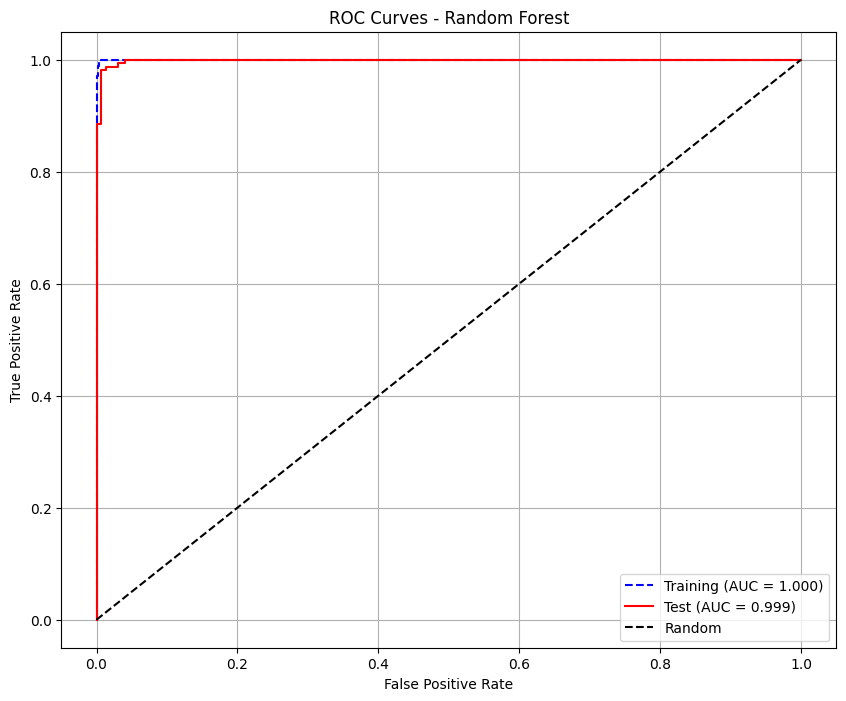

In [70]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(train_fpr, train_tpr, label=f'Training (AUC = {train_auc:.3f})', color='blue', linestyle='--')
plt.plot(test_fpr, test_tpr, label=f'Test (AUC = {test_auc:.3f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [51]:
y_pred = rf_model.predict(x_test)

In [52]:
print("\n Test Set Results : ")
print("\n Classification Report : ")
print(classification_report(y_test , y_pred))


 Test Set Results : 

 Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       297
           1       0.99      0.97      0.98       157

    accuracy                           0.98       454
   macro avg       0.99      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454



In [53]:
print("\n Confusion Matrix")
print(confusion_matrix(y_test , y_pred))


 Confusion Matrix
[[295   2]
 [  5 152]]


In [56]:
test_precision = precision_score(y_test , y_pred)
test_recall = recall_score(y_test , y_pred)
test_f1 = f1_score(y_test , y_pred)

In [71]:
print("\nTest Set Metrics Summary:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"AUC-ROC: {test_auc:.4f}")


Test Set Metrics Summary:
Precision: 0.9870
Recall: 0.9682
F1-Score: 0.9775
AUC-ROC: 0.9988


In [73]:
#optional plot feature importance
feature_importance = rf_model.feature_importances_
if hasattr(x_train, 'columns'):  # If using pandas DataFrame
    plt.figure(figsize=(10, 6))
    importances = pd.DataFrame({
        'feature': x_train.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    plt.bar(range(len(importances)), importances['importance'])
    plt.xticks(range(len(importances)), importances['feature'], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance in Random Forest Model')
    plt.tight_layout()
    plt.show()

In [74]:
# Function to get optimal threshold based on various criteria
def get_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    # Youden's J statistic (max(tpr - fpr))
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_threshold = thresholds[optimal_idx]
    
    return optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]

Meaning: Youden's J statistic measures the difference between TPR and FPR. It is used to find the threshold that maximizes the trade-off between sensitivity (TPR) and specificity (1 - FPR).

In [75]:
# Get optimal threshold
optimal_threshold, opt_fpr, opt_tpr = get_optimal_threshold(y_test, test_probs)
print(f"\nOptimal threshold (Youden's J): {optimal_threshold:.4f}")
print(f"At optimal threshold - FPR: {opt_fpr:.4f}, TPR: {opt_tpr:.4f}")



Optimal threshold (Youden's J): 0.3648
At optimal threshold - FPR: 0.0067, TPR: 0.9809


In [76]:
# Create predictions using optimal threshold
y_pred_optimal = (test_probs >= optimal_threshold).astype(int)
print("\nMetrics at optimal threshold:")
print(classification_report(y_test, y_pred_optimal))


Metrics at optimal threshold:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       0.99      0.98      0.98       157

    accuracy                           0.99       454
   macro avg       0.99      0.99      0.99       454
weighted avg       0.99      0.99      0.99       454



### Calculate ROC Curve:

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)


Input: y_true (true labels), y_prob (predicted probabilities).

Output: FPR (False Positive Rate), TPR (True Positive Rate), thresholds for different decision points.

### Compute Youden's J Statistic:

In [ ]:
j_scores = tpr - fpr


Meaning: Youden's J statistic measures the difference between TPR and FPR. It is used to find the threshold that maximizes the trade-off between sensitivity (TPR) and specificity (1 - FPR).

### Find Optimal Threshold Index:

In [ ]:
optimal_idx = np.argmax(j_scores)


Meaning: Identifies the index where Youden's J statistic is highest.

### Get Optimal Threshold:

optimal_threshold = thresholds[optimal_idx]


Meaning: The decision threshold corresponding to the highest Youden's J statistic.

### Return Optimal Threshold and Corresponding FPR/TPR:

In [ ]:
return optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]


## 2. Usage of the Function

### Calculate Optimal Threshold:

In [ ]:
optimal_threshold, opt_fpr, opt_tpr = get_optimal_threshold(y_test, test_probs)
print(f"\nOptimal threshold (Youden's J): {optimal_threshold:.4f}")
print(f"At optimal threshold - FPR: {opt_fpr:.4f}, TPR: {opt_tpr:.4f}")


Explanation: This calculates the optimal threshold using the get_optimal_threshold function for the test data.

### Create Predictions Using Optimal Threshold:

In [ ]:
y_pred_optimal = (test_probs >= optimal_threshold).astype(int)
print("\nMetrics at optimal threshold:")
print(classification_report(y_test, y_pred_optimal))

Explanation: This creates new predictions (y_pred_optimal) using the optimal threshold and evaluates the performance using the classification report.

## Benefits of Using Optimal Threshold:

### Improved Model Performance:

Optimizes the trade-off between sensitivity and specificity.

Reduces false positives and false negatives.

### Application-Specific Customization:

Adjust thresholds based on the importance of precision or recall in your specific application.

For example, in medical diagnostics, you might prioritize sensitivity to catch as many positive cases as possible.

## Visualizing ROC Curve with Optimal Threshold:

You can visually inspect the ROC curve to understand how the optimal threshold improves the balance between TPR and FPR.

## Key Points to Remember:

Threshold selection is crucial in binary classification problems, especially where class imbalance or different costs of false positives and false negatives exist.

Youden's J statistic provides a straightforward method to select a threshold that maximizes overall accuracy by balancing TPR and FPR.